<a href="https://colab.research.google.com/github/oktaviacitra/classification/blob/main/rpsclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

origin_path = '/content/drive'
drive.mount(origin_path)

Mounted at /content/drive


In [42]:
import tensorflow
from keras.preprocessing.image import ImageDataGenerator

folder_path = origin_path + '/MyDrive/Learning Journey/rps/'

augmentation = ImageDataGenerator(
    brightness_range=(0.0, 0.3),
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest",
    rescale=1/255.,
    validation_split=0.4)

train_generator = augmentation.flow_from_directory(folder_path,
                                                   target_size = (60, 90),
                                                   class_mode = 'categorical',
                                                   subset = 'training'
                                                   )

validation_generator = augmentation.flow_from_directory(folder_path,
                                                        target_size = (60, 90),
                                                        class_mode = 'categorical',
                                                        subset = 'validation'
                                                        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

model = Sequential([
    Conv2D(2, (3, 3), activation = 'relu', padding="same", name="conv_1", input_shape = (60, 90, 3)),
    Flatten(name="flatten"),
    Dense(1024, activation = 'relu', name="dense_1"),
    Dense(3, activation = 'softmax', name="dense_2")
], name="model")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 60, 90, 2)         56        
                                                                 
 flatten (Flatten)           (None, 10800)             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              11060224  
                                                                 
 dense_2 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 11,063,355
Trainable params: 11,063,355
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.4,   
    patience=2, 
    min_lr=0.001,
    verbose=1
)
best_weight = ModelCheckpoint(folder_path + "{epoch:02d}-{val_loss:.4f}.h5",
                              monitor="val_loss",
                              mode="min",
                              save_best_only=True,
                              verbose=1)
stop_early = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, epochs=200,
             validation_data=validation_generator,
             callbacks=[stop_early, best_weight, reduce_lr],
             verbose=1)

Epoch 1/200
42/42 [==============================] - ETA: 0s - loss: 1.3428 - accuracy: 0.4262
Epoch 1: val_loss improved from inf to 1.01573, saving model to /content/drive/MyDrive/Learning Journey/rps/01-1.0157.h5
42/42 [==============================] - 100s 2s/step - loss: 1.3428 - accuracy: 0.4262 - val_loss: 1.0157 - val_accuracy: 0.5355 - lr: 0.0010
Epoch 2/200
41/42 [============================>.] - ETA: 0s - loss: 1.0460 - accuracy: 0.5198
Epoch 2: val_loss improved from 1.01573 to 1.00047, saving model to /content/drive/MyDrive/Learning Journey/rps/02-1.0005.h5
42/42 [==============================] - 11s 275ms/step - loss: 1.0465 - accuracy: 0.5198 - val_loss: 1.0005 - val_accuracy: 0.5618 - lr: 0.0010
Epoch 3/200
42/42 [==============================] - ETA: 0s - loss: 0.9602 - accuracy: 0.5693
Epoch 3: val_loss improved from 1.00047 to 0.91836, saving model to /content/drive/MyDrive/Learning Journey/rps/03-0.9184.h5
42/42 [==============================] - 11s 275ms/step 

In [46]:
import matplotlib.pyplot as plt

def graph_history(title, subtitle, interval):
    plt.plot(history.history[title], label = title)
    plt.plot(history.history[subtitle], label = subtitle)
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.ylim(interval)
    plt.legend(loc='lower right')

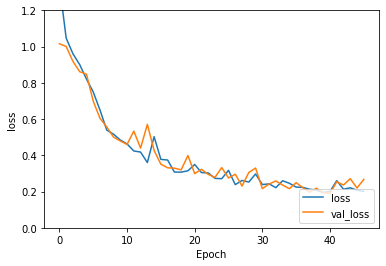

In [47]:
graph_history('loss', 'val_loss', [0.0, 1.2])

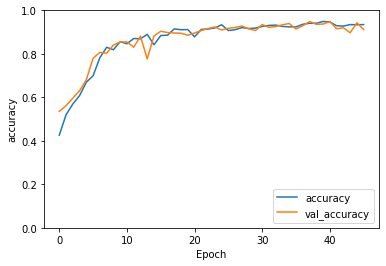

In [48]:
graph_history('accuracy', 'val_accuracy', [0.0, 1.0])

Saving IMG_9113.jpg to IMG_9113.jpg
1/1 [==============================] - 0s 48ms/step
IMG_9113.jpg
rock


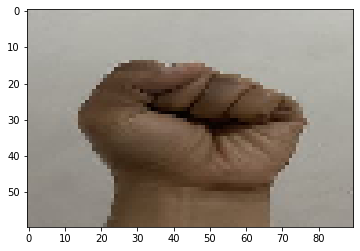

In [57]:
from google.colab import files
from keras.utils import load_img, img_to_array
from keras.models import load_model
import numpy as np

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img_source = load_img(path, target_size = (60, 90))
  imgplot = plt.imshow(img_source)
  x = img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('rock')
  elif classes[0, 1] == 1:
    print('paper')
  elif classes[0, 2] == 1:
    print('scissors')